In [55]:
from langgraph.graph import StateGraph, START, END, MessagesState

In [56]:
class MyState(MessagesState, total=False):
    query: str

In [57]:
from langchain.tools import tool

In [58]:
@tool
def add(a: int, b: int) -> int:
    """Adds two numbers

    Args:
        a (int): 
        b (int): 

    Returns:
        int: sum of two numbers
    """
    return a + b

In [59]:
from utils import get_llm

llm = get_llm()

In [60]:
tools = [add]

In [61]:
response = llm.invoke("What is 4 + 5")
response

AIMessage(content='4 + 5 = 9', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 7, 'candidates_token_count': 7, 'total_token_count': 14, 'prompt_tokens_details': [{'modality': 1, 'token_count': 7}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 7}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.04986016239438738, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash-lite'}, id='lc_run--fe3d1422-90a6-4fc8-a481-993a61618e47-0', usage_metadata={'input_tokens': 7, 'output_tokens': 7, 'total_tokens': 14, 'input_token_details': {'cache_read': 0}})

In [62]:
response = llm.invoke("What is capital of india")
response

AIMessage(content='The capital of India is **New Delhi**.', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 5, 'candidates_token_count': 9, 'total_token_count': 14, 'prompt_tokens_details': [{'modality': 1, 'token_count': 5}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 9}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.0004185653395122952, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash-lite'}, id='lc_run--9b3c23e6-95a7-40b2-8d44-7e91370cb1e2-0', usage_metadata={'input_tokens': 5, 'output_tokens': 9, 'total_tokens': 14, 'input_token_details': {'cache_read': 0}})

In [63]:
# making llm aware of tools
llm_with_tools = llm.bind_tools(tools)

In [64]:
# checking how this works
response = llm_with_tools.invoke("What is 4 + 5")

In [65]:
response

AIMessage(content='', additional_kwargs={'function_call': {'name': 'add', 'arguments': '{"a": 4.0, "b": 5.0}'}}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 46, 'candidates_token_count': 5, 'total_token_count': 51, 'prompt_tokens_details': [{'modality': 1, 'token_count': 46}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 5}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.024428629875183107, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash-lite'}, id='lc_run--ab4a8baa-f3f0-44ff-a481-152932e17f5a-0', tool_calls=[{'name': 'add', 'args': {'a': 4.0, 'b': 5.0}, 'id': '9acc96a6-606c-49ca-8144-de8dee9bb88b', 'type': 'tool_call'}], usage_metadata={'input_tokens': 46, 'output_tokens': 5, 'total_tokens': 51, 'input_token_details': {'cache_read': 0}})

In [66]:
response = llm_with_tools.invoke("What is capital of india")
response

AIMessage(content='I cannot tell you the capital of India, but I can add two numbers.', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 44, 'candidates_token_count': 16, 'total_token_count': 60, 'prompt_tokens_details': [{'modality': 1, 'token_count': 44}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 16}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.3610404133796692, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash-lite'}, id='lc_run--a17b2bfc-fb64-49fe-9e27-b31cf97b9f8f-0', usage_metadata={'input_tokens': 44, 'output_tokens': 16, 'total_tokens': 60, 'input_token_details': {'cache_read': 0}})

In [67]:
# Langgraph
from langgraph.prebuilt import ToolNode, tools_condition

# node
def ask_llm(state: MyState):
    """This will asks llm
    """
    return { "messages": [llm_with_tools.invoke(state['query'])] }

tool_node = ToolNode(tools)

In [68]:
tool_graph = StateGraph(MyState)
tool_graph.add_node("ask", ask_llm)
tool_graph.add_node("tools", tool_node)

In [69]:
tool_graph.set_entry_point("ask")
tool_graph.add_conditional_edges("ask", tools_condition, {
    "tools": "tools",
    "__end__": END
})
graph = tool_graph.compile()

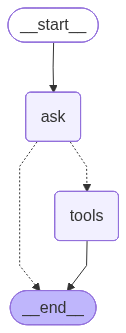

In [70]:
graph

In [71]:
response = graph.invoke({"query": "What is capital of india", "messages": []})

In [72]:
response


{'messages': [AIMessage(content='I am sorry, I can only perform mathematical operations. I cannot provide information such as the capital of India.', additional_kwargs={}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 44, 'candidates_token_count': 22, 'total_token_count': 66, 'prompt_tokens_details': [{'modality': 1, 'token_count': 44}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 22}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.16673652692274613, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash-lite'}, id='lc_run--db0e25ff-4929-4cb0-b0ec-75f03ad33475-0', usage_metadata={'input_tokens': 44, 'output_tokens': 22, 'total_tokens': 66, 'input_token_details': {'cache_read': 0}})],
 'query': 'What is capital of india'}

In [73]:
response = graph.invoke({"query": "What is 4 + 5", "messages": []})

In [74]:
response

{'messages': [AIMessage(content='', additional_kwargs={'function_call': {'name': 'add', 'arguments': '{"a": 4.0, "b": 5.0}'}}, response_metadata={'is_blocked': False, 'safety_ratings': [], 'usage_metadata': {'prompt_token_count': 46, 'candidates_token_count': 5, 'total_token_count': 51, 'prompt_tokens_details': [{'modality': 1, 'token_count': 46}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 5}], 'thoughts_token_count': 0, 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.024428629875183107, 'model_provider': 'google_vertexai', 'model_name': 'gemini-2.5-flash-lite'}, id='lc_run--25dca5d7-5bd9-4666-98c6-8b72c527b3da-0', tool_calls=[{'name': 'add', 'args': {'a': 4.0, 'b': 5.0}, 'id': 'f8dd75bd-ee7f-40ac-9b9a-63491e2c8e7a', 'type': 'tool_call'}], usage_metadata={'input_tokens': 46, 'output_tokens': 5, 'total_tokens': 51, 'input_token_details': {'cache_read': 0}}),
  ToolMessage(content='9', name='add', id='8ba88246-0